In [1]:
#loading libraries 
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.preprocessing import StandardScaler     # standard scaler 
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
import random as rand # random number generation
import gender_guesser.detector as gender # guess gender based on (given) name



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#  path to the dataset 
file = './datasets/Apprentice_chef_Dataset.xlsx'
#reading the file into python 
my_df = pd.read_excel(file)

In [2]:
#splitting emails 
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_df.iterrows():
    
    # splitting email domain at '@'
    split_email = my_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


In [3]:
# renaming column to concatenate
email_df.columns = ['0', 'email_domain']


# concatenating personal_email_domain with friends DataFrame
my_df = pd.concat([my_df,email_df['email_domain']],
                   axis = 1)

In [4]:
#email domain types 

#splitting professional email 
professional_email_domain = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']

#splitting personal email 
personal_email_domain = ['@gmail.com',
                        '@yahoo.com',
                        '@protonmail.com']

#splitting junk email 
junk_email_domain = ['@me.com',
                    '@aol.com',
                    '@hotmail.com',
                    '@live.com',
                    '@msn.com',
                    '@passport.com']

In [5]:
# placeholder list
placeholder2 = []


# looping to group observations by domain type
for domain in my_df['email_domain']:
        if '@' + str(domain) in personal_email_domain:
            placeholder2.append('personal')
            
        elif '@' + str(domain) in professional_email_domain:
            placeholder2.append('professional')
        
        elif '@' + str(domain) in junk_email_domain:
            placeholder2.append('junk')
        
        
        else:
            print('Unknown')


# concatenating with original DataFrame
my_df['domain_group'] = pd.Series(placeholder2)


# checking results
my_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [6]:
# get dummies for domain group
dummies = pd.get_dummies(my_df['domain_group'])

# concatenating personal_email_domain with friends DataFrame
my_df = pd.concat([my_df, dummies],
                     axis = 1)

In [7]:
# feature engineeering, splitting genders to create features 
d = gender.Detector()

my_df['gender'] = my_df['FIRST_NAME'].map(lambda x: d.get_gender(x))


male_list = ['Addam','Aegon','Aegor','Aelinor','Aemon','Aggar','Aggo','Alannys',
             'Albett','Alebelly','Arson','Artos','Arwyn','Baelor','Barbrey',
             'Barre','Barristan','Barth','Beck','Beldecar','Bellegere','Beron',
             'Black','Bloodbeard','Bodger','Bonifer','Boros','Bradamar','Brogg',
             'Bronn','Byan','Calon','Canker','Carellen','Cetheres','Chett',
             'Chiswyck','Cleos','Coldhands','Colemon','Corlys','Cortnay',
             'Crawn','Cuger','Dacks','Daemon','Daeron','Dafyn','Dagon','Dake',
             'Danwell','Dickon','Donel','Donnel','Donnor','Dontos','Dornish',
             'Draqaz','Drennan','Duram','Eddard','Edderion','Edmyn','Edric',
             'Edwyn','Eggon','Endrew','Fornio','Fralegg','Frenken','Garizon',
             'Garlan','Garse','Gendel','Gorold','Gran','Grazdan','Grazdar',
             'Greydon','Gulian','Guthor','Gwayne','Gyles','Halmon','Harle',
             'Harren','Harrold','Harwyn','Hoarfrost','Hoke','Hot','Hother',
             'Humfrey','Hunnimore','Irri','Jack-Be-Lucky','Jaremy','Jeor',
             'Jhaqo','Jhiqui','Aerion','Andros','Androw','Arys','Bael','Balman',
             'Balon','Bannen','Belwas','Benjen','Beric','Boremund','Borroq',
             'Bran','Branston','Brown','Brynden','Byam','Byren','Cleyton','Cohollo',
             'Collio','Colmar','Cossomo','Craghas','Cragorn','Cregan','Cutjack',
             'Dagmer','Jonos','Deziel','Doran','Dunaver','Dunsen','Durran','Easy',
             'Edmure','Edwyd','Elys','Eon','Erryk','Esgred','Falyse','Farlen',
             'Ferrego','Flement','Garigus','Godwyn','Gormond','Gurn','Guyard',
             'Gwin','Gylbert','Gynir','Hake','Halder','Haldon','Horas','Halys',
             'Harlon','Harmond','Harmune','Harrag','Harwin','Harwood','Harys',
             'Hayhead','Hazrak','Helliweg','High','Hizdahr','Hobb','Hoster',
             'Howland','Hullen','Hyle','Ilyn','Jaehaerys','Jate','Aemond',
             'Alekyne','All-for-Joffrey','Allaquo','Ambrode','Andar','Antario',
             'Arrec','Arwood','Axell','Azor','Azzak','Baelon','Barthogan','Bayard',
             'Bearded','Benedar','Bennis','Beqqo','Betharios','Bharbo','Big',
             'Blind','Blue','Bluetooth','Briar','Brusco','Bryen','Butterbumps',
             'Cellador','Clubfoot','Clydas','Colen','Coratt','Cotter','Daegon',
             'Dagos','Dancy','Danos','Delonne','Delp','Domeric','Dykk','Ebrose',
             'Eddison','Edrick','Eldiss','Emphyria','Erreck','Erreg','Fogo',
             'Galazza','Galladon','Galyeon','Gawen','Gelmarr','Gendry','Gerardys',
             'Gerren','Gerris','Gevin','Gillam','Gilwood','Gladden','Godric',
             'Godry','Gormon','Gowen','Great','Green','Greenbeard','Grey','Grubbs',
             'Gunthor','Guyne','Gwynesse','Gyleno','Gyloro','Daario','Hallis',
             'Hareth','Harmund','Heward','Horton','Husband','Imry','Jafer',
             'Jeffory','Walys','Jhogo','Jorelle','Joseth','Jyck','Kaeth',
             'Kennos','Kirth','Kojja','Kurz','Lamprey','Lancel','Larence','Leathers',
             'Lem','Lenn','Lewys','Lister','Lomys','Lorent','Lotho','Lucimore',
             'Lucion','Lucos','Lymond','Mace','Mallor','Malwyn','Manfrey','Manfryd',
             'Mathos','Mawney','Medgar','Melwys','Mollos','Moreo','Moryn','Mudge',
             'Murch','Naerys','Narbert','Norjen','Normund','Tybolt','Rodrik',
             'Ollidor','Olyvar','Jonothor','Joth','Karyl','Kedge','Koss','Kraznys',
             'Kromm','Kurleket','Kyleg','Lark','Lenwood','Lenyl','Leobald','Leonette',
             'Loras','Lorcas','Gallard','Lord','Lorren','Luwin','Lythene',
             'Marwyn','Matrice','Mazdhan','Mebble','Meldred','Melly','Merrell',
             'Mezzara','Monterys','Moonshadow','Mord','Morgarth','Morros','Munciter',
             'Mychel','Mallador','Walder','Old','Ollo','Olymer','Jorah','Joyeuse',
             'Ardrian','Kemmett','Kezmya','Khorane','Khrazz','Larys','Lennocks',
             'Lomas','Lothor','Lucamore','Lucifer','Luco','Luthor','Lync','Lysono',
             'Maelor','Mance','Marillion','Marq','Medger','Melicent','Aglantine',
             'Melwyn','Merlon','Merrett','Mikken','Miklaz','Moredo','Moribald',
             'Mullin','Murenmure','Muttering','Mycah','Narbo','Notch','Nymeria',
             'Nymos','Ondrew','Orell','Ormund','Orphan','Orwyle','Orys','Otter',
             'Ottomore','Ottyn','Pate','Patrek','Paxter','Pearse','Plummer',
             'Podrick','Pyat','Pylos','Qarl','Quenton','Quort','Ermesande',
             'Randyll','Rawney','Reznak','Rhaegar','Rhaegel','Rhaego','Rhaella',
             'Roelle','Rolder','Rolfe','Ronnel','Roose','Rugen','Ryam','Rycherd',
             'Ryman','Salladhor','Sallor','Salloreon','Samwell','Sargon','Senelle',
             'Shagga','Shyra','Sour','Squint','Stevron','Stonehand','Sylas',
             'Symond','Syrio','Tarber','Theon','Thormor','Timeon','Timett',
             'Todric','Tommard','TomToo','Torbert','Torrhen','Tregar','Tristifer',
             'Tumberjon','Tya','Tybero','Tyene','Tyland','Tyrek','Tyrion','Tywin',
             'Ulwyck','Vaemond','Valarr','Viserys','Vortimer','Waldon','Wallen',
             'Warryn','Willam','Willum','Wyl','Yellow','Ygon','Oro','Orton',
             'Osbert','Osfryd','Pono','Porridge','Porther','Portifer','Prendahl',
             'Qarlton','Qarro','Quellon','Quhuru','Quickfinger','Rafe','Edgerran',
             'Raymar','Raymun','Redwyn','Regenard','Reysen','Rickon',
             'Robar','Robett','Rolly','Roone','Rylene','Saathos','Sedgekins',
             'Sigrin','Skinner','Styr','Tallad','Tansy','Tanton','Three','Timoth',
             'Tion','Tobbot','Tommen','Tremond','Trystane','Ulrick','Umfred',
             'Urrathon','Urswyck','Urzen','Utherydes','Uthor','Vardis','Vargo',
             'Varly','Vickon','Wayn','Weese','Werlag','Willamen','Willas','Wolmer',
             'Woth','Wynafryd','Xhondo','Orbelo','Osney','Oswell','Oswyn',
             'Othell','Oznak','Parmen','Perriane','Petyr','Praed','Quill','Ragnor',
             'Helman','Maegor','Rat','Reynard','Rhaelle','Romny','Roryn','Runcel',
             'Ryles','Ryon','Sandor','Sarra','Sebaston','Sigfry','Skahaz','Skyte',
             'Spare','Spotted','Stalwart','Steely','Stonesnake','Sybassion',
             'Sybell','Ternesio','Theodan','Theomar','Thoren','Toregg','Trebor',
             'Tumco','Tysane','Tyta','Tytos','Uller','Urreg','Varamyr','Vayon',
             'Shortear','Waltyr','Wat','Whalen','Willifer','Toefinger','Wun',
             'Wylis','Wynafrei','Wynton','Yohn','Yormwell','Zei','Zekko','Zharaq',
             'Zhoe','Abelar','Aethelmure','Alequo','Laenor','Denyo','Alfyn','Anguy',
             'Arneld','Arnell','Arryk','Arthor','Ayrmidon','Ballabar','Bandy',
             'Beardless','Bedwyck','Benfred','Bennard','Bennarion','Biter','Bors',
             'Bump','Buu','Cadwyn','Castos','Cedrik','Cerrick','Cheyk','Chiggen',
             'Clarent','Craster','Cressen','Criston','Dalbridge','Dareon','Squinty',
             'Dhazzar','Dormund','Drogo','Dryn','Dywen','Edwyle','Elder','Elron',
             'Emmon','Emmond','Emrick','Eroeh','Eyron','Ezzelyno','Jothos','Urron',
             'Alyx','Ferret','Galtry','Gascoyne','Ghael','Grenn','Gretchel',
             'Groleo','Gueren','Guncer','Gyldayn','Haggon','Hairy','Harghaz',
              'Harra','Harras','Harrion','Harsley','Hazzea','Helicent','Henly',
             'Hodor','Hop-Robin','Hosman','Hosteen','Hotho','Hubard','Hugor',
             'Illyrio','Ironbelly','Jacks','Jaggot','Jammos','Janos','Jeren',
             'Jodge','Jojen','Jyzene','Kedry','Kenned','Larraq','Left','Lewyn',
             'Lharys','Lucan','Lum','Mad','Maege','Malliard','Mandon','Matarys',
             'Matthar','Matthos','Meizo','Merrit','Monster','Moro','Morrec',
             'Murmison','Nage','Nettles','Nissa','Norne','Norren','Nute','Ocley',
             'Ogo','Orbert','Orivel','Ossifer','Ossy','Othor','Palla','Perwyn',
             'Poetess','Pollitor','Polliver','Poxy','Puckens','Pudding',
             'Puddingfoot','Pycelle','Pyg','Pypar','Qotho','Quaro','Qyburn',
             'Racallio','Ragwyle','Rakharo','Redtusk','Reek','Renfred','Renly',
             'Rhogoro','Ricasso','Rodwell','Roggo','Rollam','Ronel','Ronnet',
             'Rorge','Roro','Rossart','Rudge','Runciter','Ryger','Rymolf',"Sailor's",
             'Sawwood','Scarb','Selmond','Shae','Sherrit','Sigfryd','Skittrick',
             'Squirrel','Stannis','Yoren','Xaro','Endehar','Mushroom','Frenya',
             'Albar','Satin','Errok','Enger','Galbart','Likely','Todder','Haggo',
             'Goady','Grigg','Joramun','Wendello','Forley','Medwick','Steelskin',
             'Stiv','Stygg','Tanselle','Terro','Theomore','Thistle','Hobber',
             'Illifer','Mollander','Lollys','Shagwell','Gared','Karlon','Daven',
             'Rigney','Togg','Tomard','Tormund','Torrek','Torren','Torwynd',
             'Ryk','Malleon','Jorgen','Zollo','Ghost','Frynne','Gorne','Tristimun',
             'Tuffleberry','Turnip','Patchface','Goodwin','Osmynd','Umma','Gerion',
             'Mago','Mero','Watt','Tymor','Chayle','Davos','Bhakaz','Carrot',
             'Tysha','Ulmer','Unella','Urek','Vyman','Tothmure','Turquin','Rast',
             'Jalabhar','Benfrey','Urrigon','Qos','Tygett','Ordello','Qhorin',
             'Mully','Tagganaro','Varys','Mohor','Veiled','Victarion','Vylarr',
             'Wex','Luton','Cadwyl','Utt','Cley','Maric','Perros','Walgrave',
             'Moqorro','Borcas','Jonnel','Harodon','Mirri','Jommy','Kegs','Grisel',
             'Jommo','Monford','Wate','Watty','Luceon','Osha','Sloey','Meribald',
             'Argrave','Lucias','Rafford','Weasel','Tobho','Dyah','Dunstan',
             'Wulfe','Cosgrove','Three-Tooth','Conwy','Hibald','Grunt','Areo',
             'Rhae','Willit','Yandry','Mors','Yorkel']
 
female_list = ['Aemma','Alester','Alicent','Alysanne','Annara','Bass','Berena',
               'Bessa','Brenett','Caleotte','Cyrenna', 'Daella','Daughter','Delena',
               'Doreah','Ebben','Eustace','Falia','Janei','Jaqen','Jeyne','Aladale',
               'Ashara','Belandra','Cassella','Catelyn','Cerenna','Chella',
               'Daena','Daenerys','Yorko','Dorea','Eddara','Elaena','Eleyna',
               'Ellaria','Elyn','Erena','Gariss','Grance','Grisella','Gysella',
               'Helya','Aenys','Aethan','Alliser','Allyria','Baela','Cynthea',
               'Dacey','Donyse','Falena','Jacelyn','Jaehaera','Jyana','Ketter',
               'Lann','Lanna','Lyessa','Maerie','Marghaz','Maslyn','Melara',
               'Mellara','Missandei','Obella','Oberyn','Olene','Jynessa','Laena',
               'Lyanna','Mag','Margaery','Megga','Melesa','Merling','Moelle',
               'Mother','Mysaria','Noho','Nymella','Olenna','Jyanna','Kella',
               'Layna','Loreza','Lucantine','Lynesse','Marsella','Meha','Melessa',
               'Meliana','Bellonara','Meryn','Minisa','Nightingale','Quentyn',
               'Sansa','Sawane','Selyse','Steffon','Sybelle','Valaena','Quenten',
               'Ravella','Sarella','Sarya','Scolera','Sefton','Serala','Serwyn',
               'Steffarion','Talla','Tyana','Qalen','Perra','Qyle','Rennifer',
               'Rhialta','Rosey',"S'vrone",'Saera','Sallei','Shiera','Shierle',
               'Small','Smiling','Sumner','Sylwa','Tanda','Tarle','Wylla',
               'Vaellyn','Visenya','Waymar','Wendamyr','Softfoot','Ygritte','Yna',
               'Zarabelo','Alerie','Agrivane','Carolei','Morra','Alvyn','Alysane',
               'Amarei','Amerei','Arya','Belis','Brea','Brella','Cassana','Cayn',
               'Cedra','Cersei','Chataya','Daeryssa','Darlessa','Daryn','Denestan',
               'Dobber','Donnis','Elyana','Emberlei','Erren','Mellos','Hallyne',
               'Helaena','Jorquen','Joseran','Josmyn','Jurne','Lady','Leslyn',
               'Maegelle','Mela','Melaquin','Meralyn','Merianne','Mordane','Morya',
               'Mylenda','Myrcella','Nolla','Nysterica','Obara','Quaithe','Quent',
               'Rainbow','Rhaena','Rohanne','Ryella','Sharna','Shirei','Myria',
               'Taena','Mellei','Melisandre','Alayaya','Bellena','Victaria',
               'Quence','Larra','Ezzara','Aerys','Rhaenys','Ysilla']


#creating 
chef_u = list(my_df['FIRST_NAME'][my_df['gender'] == 'unknown'])

# placeholder list        
placeholder3 = []
# for loop to group observations 
for name in chef_u:
        if name in male_list:
            placeholder3.append('male')
        elif name in female_list:
            placeholder3.append('female')
            
        else:
             print('error')
           
chef_unknown = pd.DataFrame({
    'FIRST_NAME': chef_u,
    'gender': placeholder3
})


# printing length of gender types 
print(len(male_list))
print(len(female_list))
print(len(chef_unknown))

905
208
1385


In [8]:
#MAPPING GENDERS 
my_df['gender'] = my_df['gender'].map({
      'mostly_female': 'female', 
      'mostly_male': 'male', 
      'andy': 'male',
      'female' : 'female',
      'male' : 'male',
      'unknown': 'unknown'
})

#value counts
my_df['gender'].value_counts()

unknown    1385
male        415
female      146
Name: gender, dtype: int64

In [9]:
# one hot encoding categorical variables
one_hot_gender       = pd.get_dummies(my_df['gender'])


# dropping categorical variables after they've been encoded
my_df = my_df.drop('gender', axis = 1)


# joining codings together
my_df = my_df.join([one_hot_gender])

In [10]:
#dropping non numeric values for feature engineering 
my_df_dropped = my_df.drop(columns = ['NAME','EMAIL','FIRST_NAME','FAMILY_NAME',
                                     'email_domain','domain_group'])

<ipython-input-11-bbf7e8eb795d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize = (10,8))


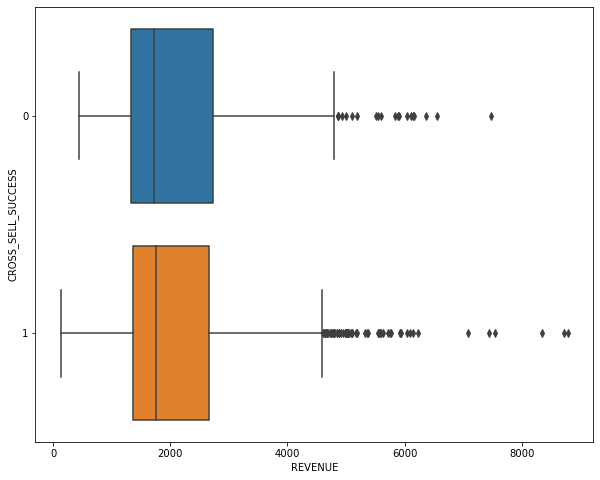

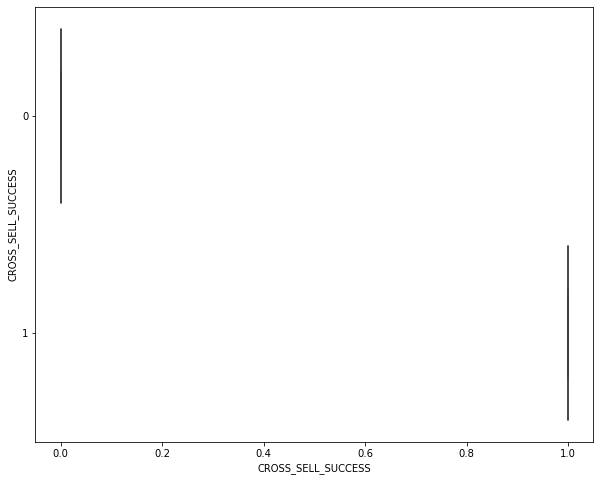

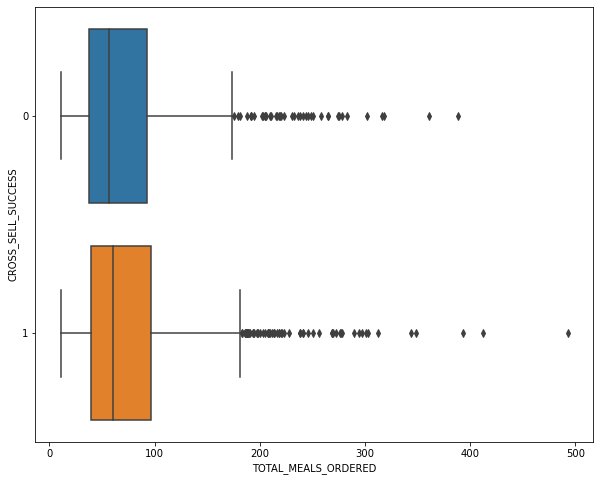

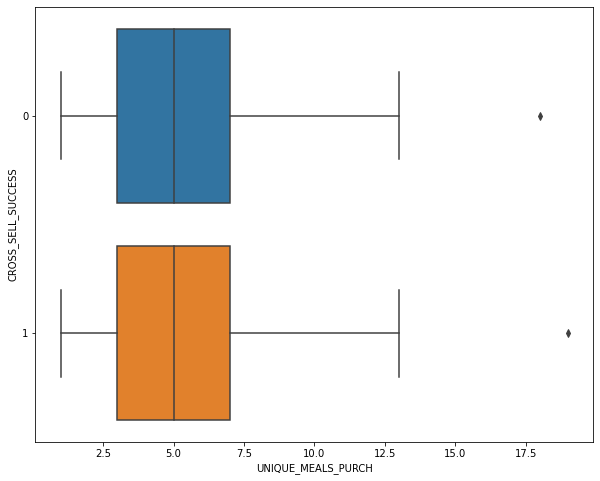

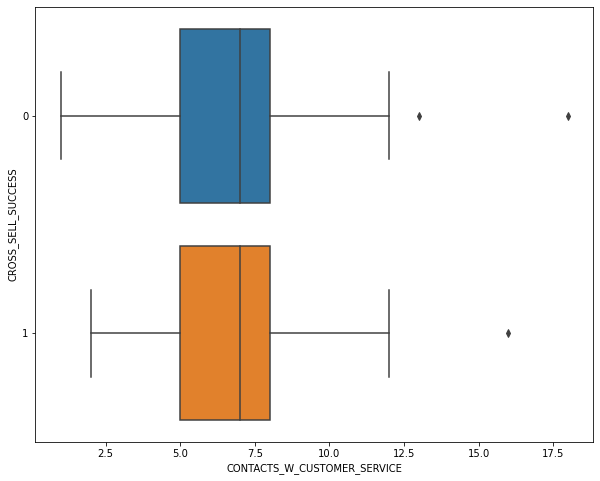

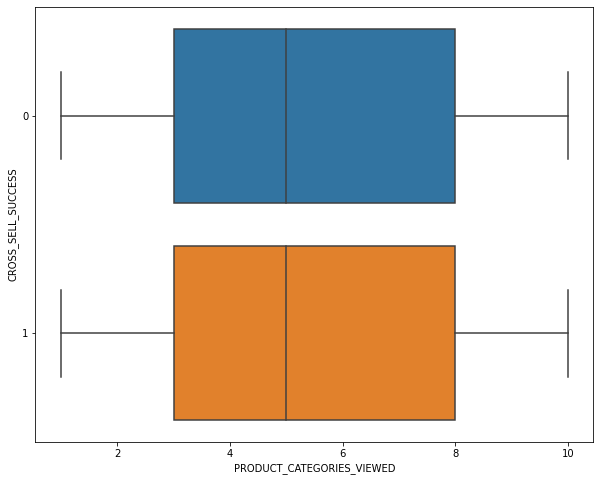

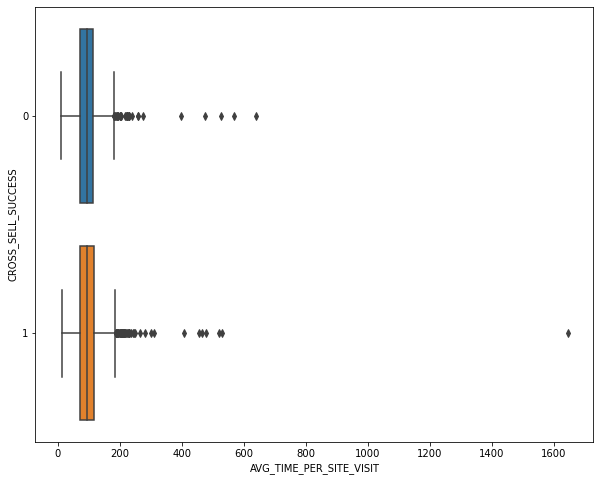

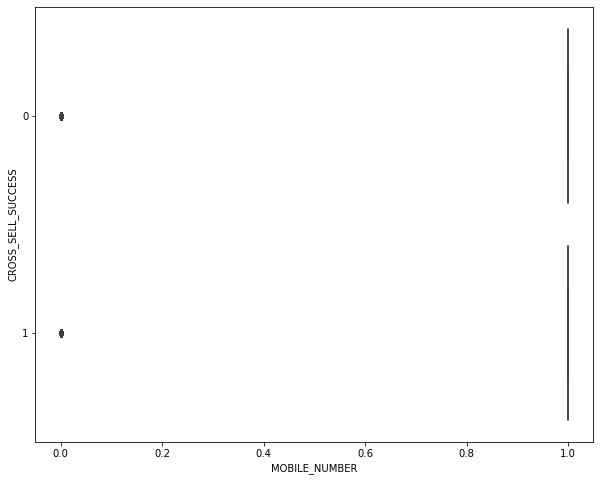

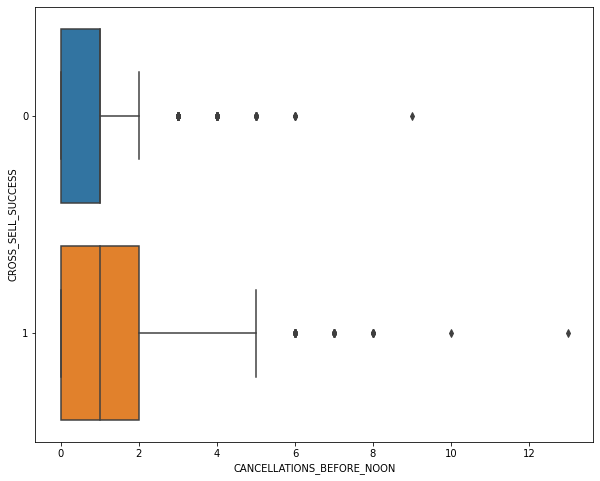

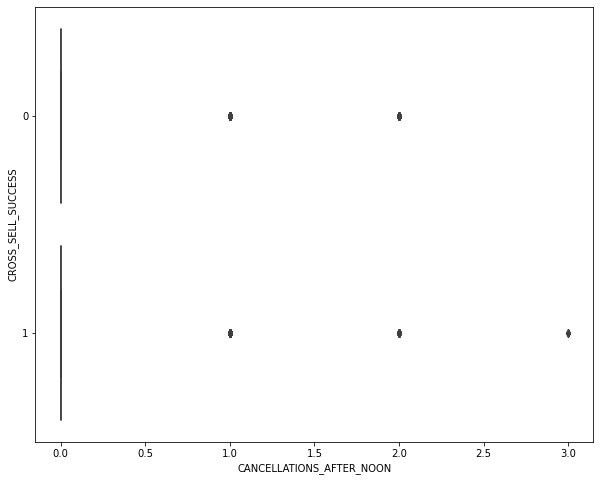

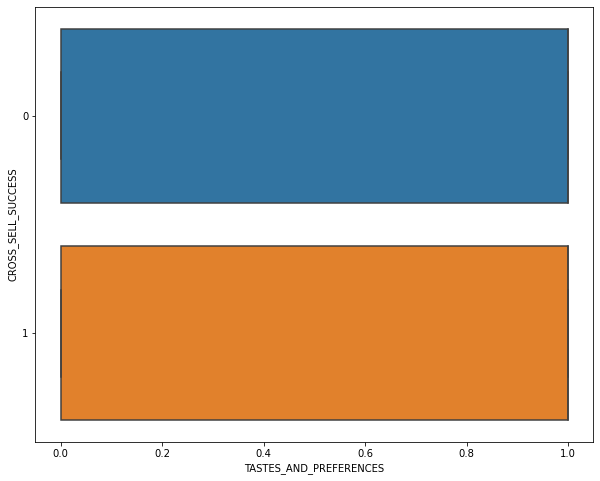

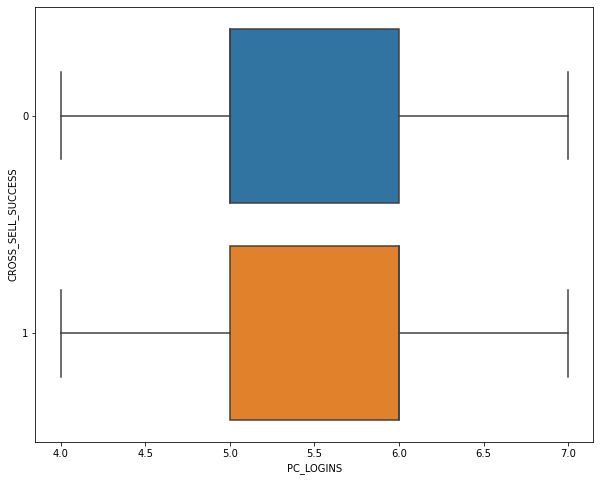

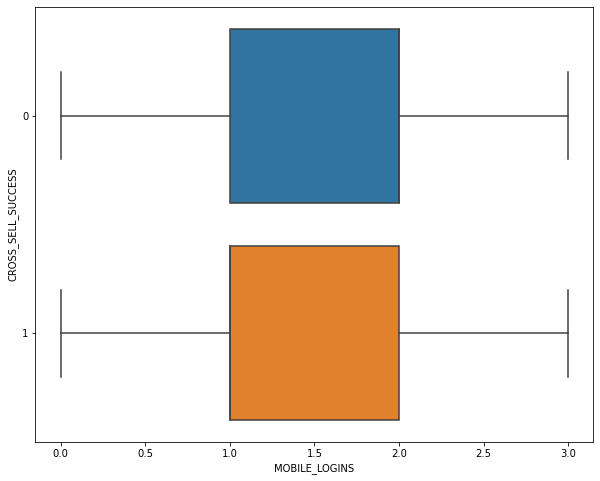

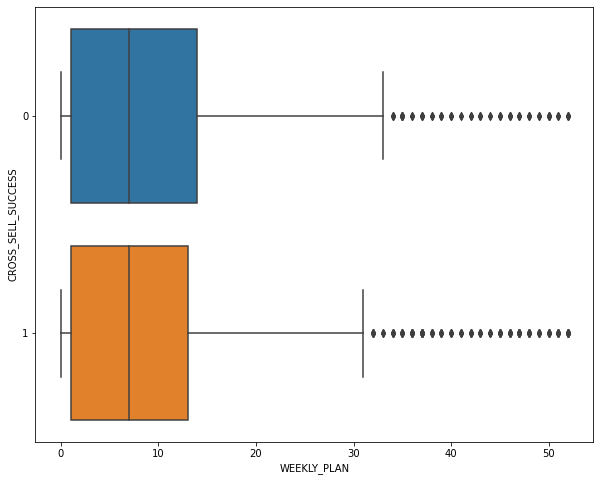

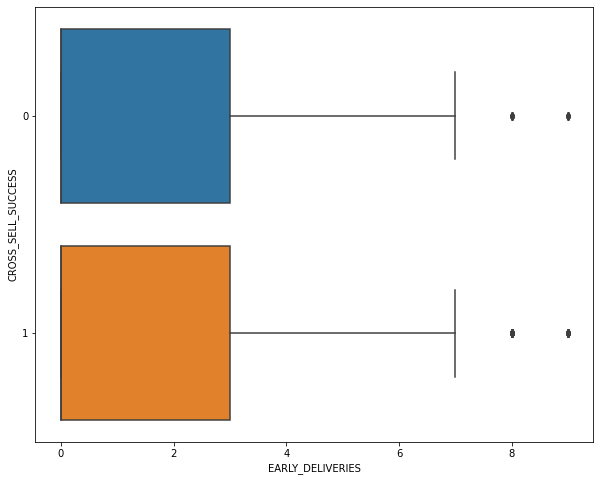

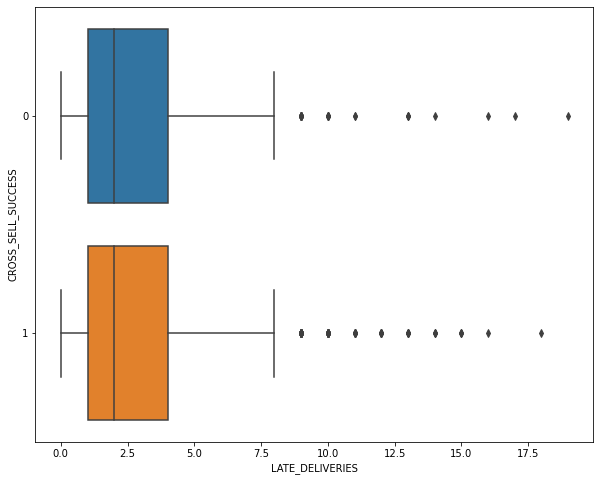

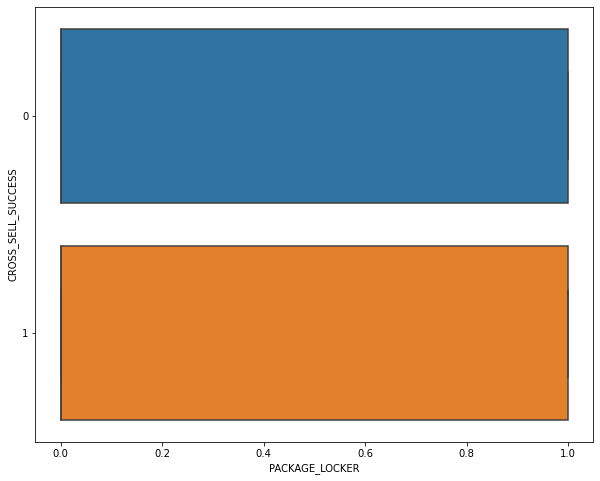

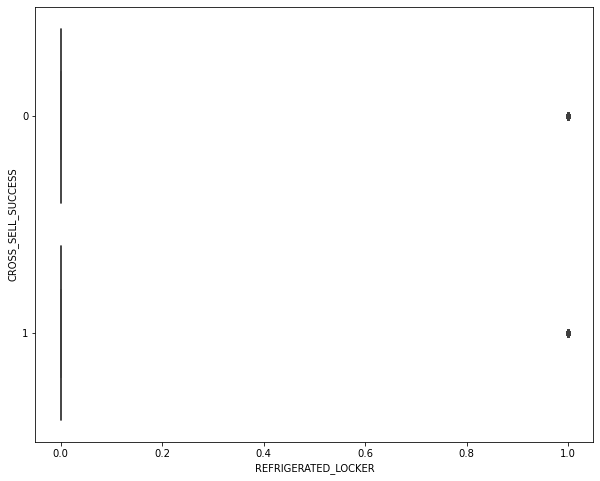

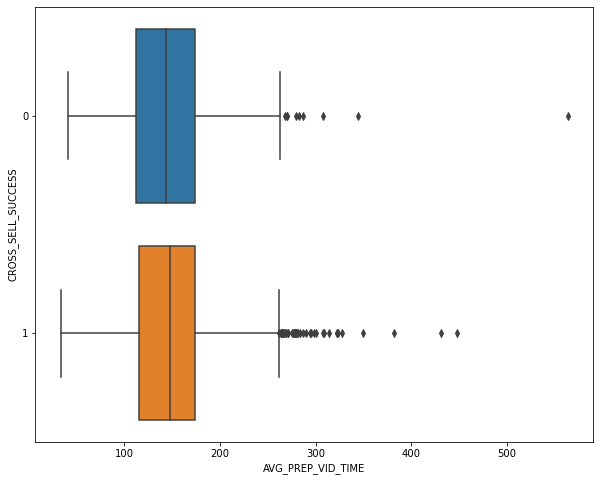

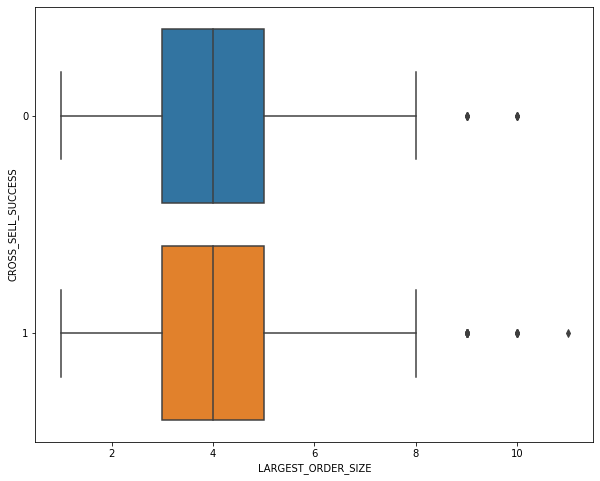

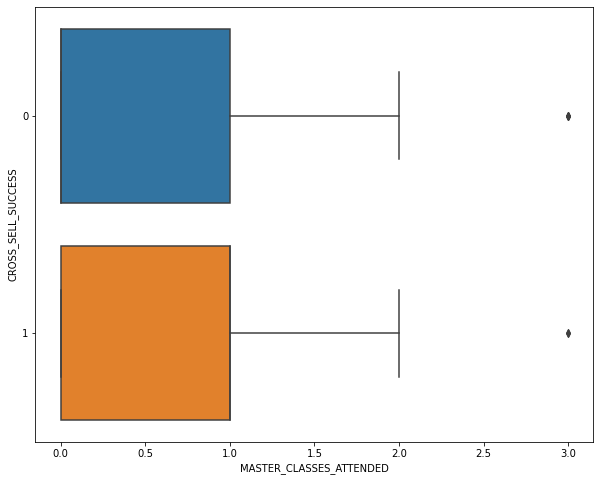

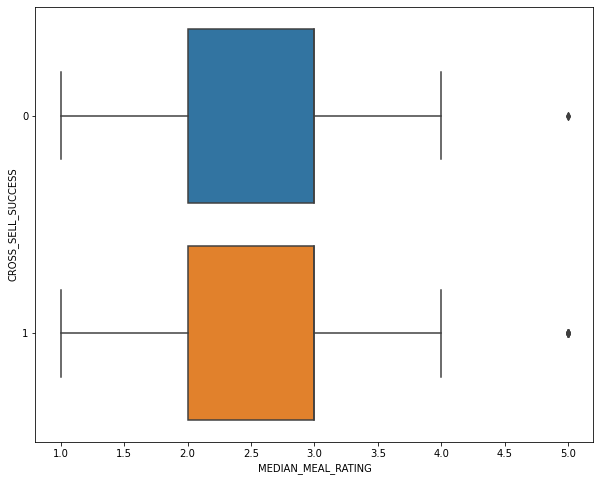

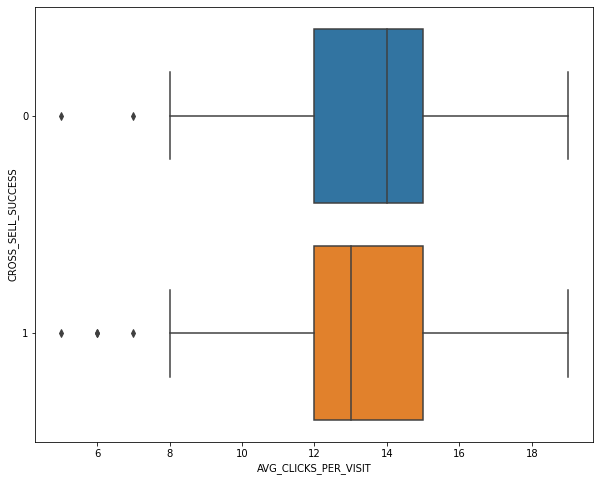

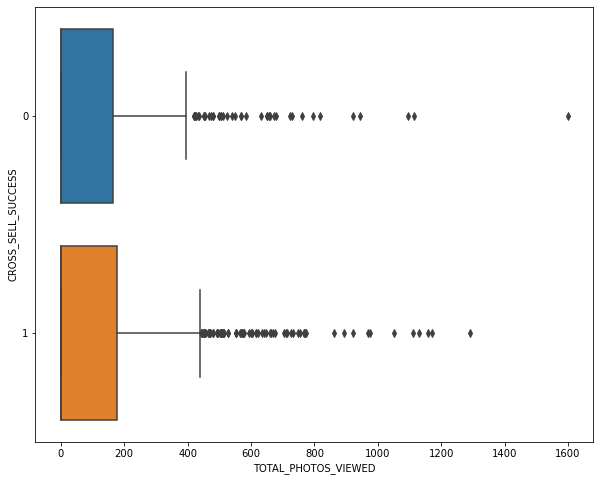

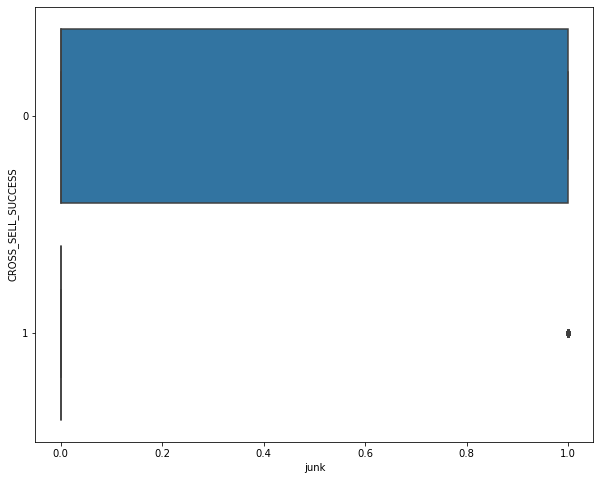

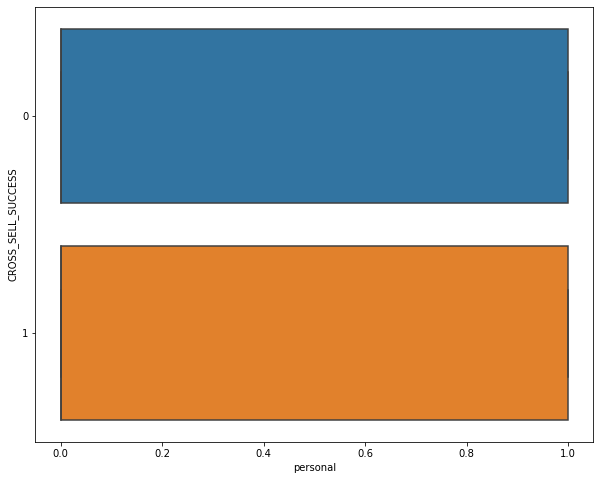

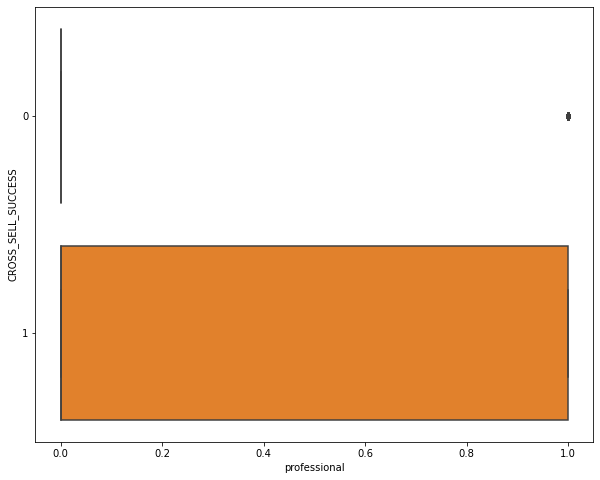

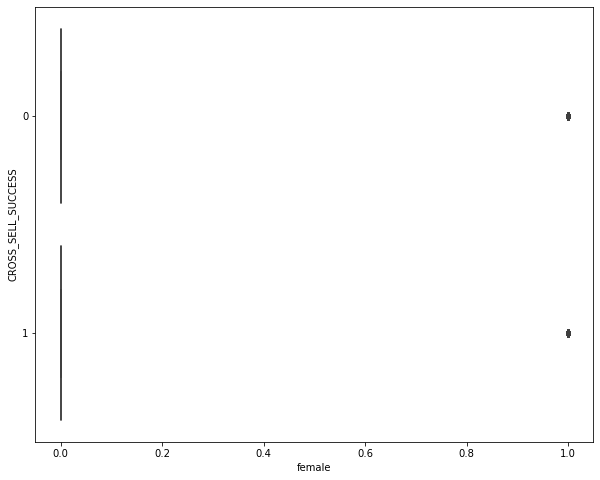

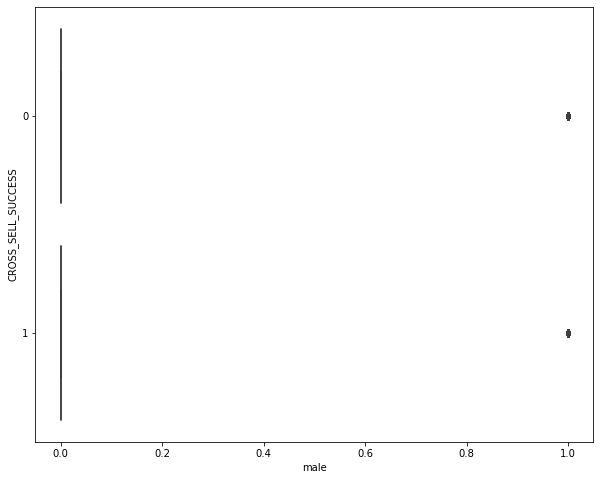

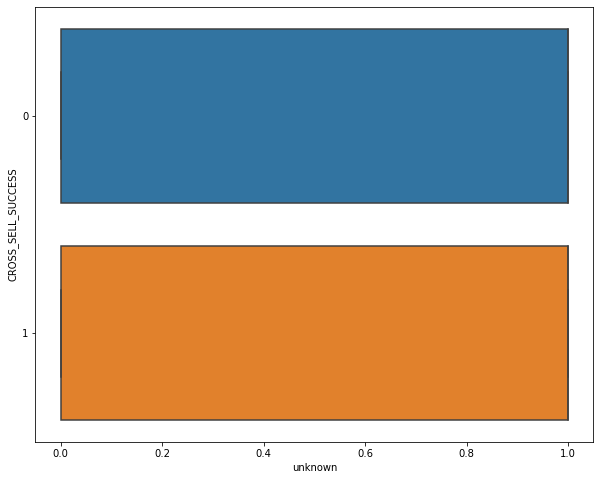

In [11]:
#feature engineering visual outlier detection 

#for loop to present box plot visuals for outliers 

for x in my_df_dropped:
    fig,ax = plt.subplots(figsize = (10,8))
    sns.boxplot(x  = x,  # x-variable
            y      = 'CROSS_SELL_SUCCESS',     #  y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = my_df_dropped)
plt.xlabel(f'{x}')
plt.show()           

In [12]:
#setting outlier threshold flags to create new features 
Revenue_out = 5000
total_meals_ord_out = 200 
uniq_meal_purch_out = 9
contact_with_cust_serv_u = 10.5
conatct_with_cust_serv_L = 2.5
avg_time_per_site_visit_out = 225
cancel_before_noon_out = 5 
cancel_after_noon_out = 1.5
weekly_plan_out = 20
early_deliveries_out = 5 
late_deliveries_out = 8 
avg_prep_vid_time_out = 250
largest_order_size_out = 8
master_class_attended_out = 1.5
median_meal_out = 4
avg_clicks_u = 19
avg_clicks_l = 8
total_phots_viewed = 300




In [13]:
# creating a for loop and Iterating over each  original column to change values in the new features columns
#creating a new feature - 

#Revenue outlier 
my_df['out_REVENUE'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'REVENUE'] > Revenue_out:
        my_df.loc[index, 'out_REVENUE'] = 1
#total meals ordered outlier
my_df['out_TOTAL_MEALS_ORDERED'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'TOTAL_MEALS_ORDERED'] > total_meals_ord_out:
        my_df.loc[index, 'out_TOTAL_MEALS_ORDERED'] = 1
#unique meal purchased outlier        
my_df['out_UNIQUE_MEAL_PURCH'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'UNIQUE_MEALS_PURCH'] > uniq_meal_purch_out:
        my_df.loc[index, 'out_UNIQUE_MEAL_PURCH'] = 1        
# contact with customer service outlier        
my_df['out_CONTACT_W_CUSTOMER_SERVICE_U'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > contact_with_cust_serv_u:
        my_df.loc[index, 'out_CONTACT_W_CUSTOMER_SERVICE_U'] = 1  
    elif my_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < conatct_with_cust_serv_L:
        my_df.loc[index, 'out_CONTACT_W_CUSTOMER_SERVICE_U'] = 1 
        
  
  #avg time site visit outlier         
my_df['AVG_TIME_SITE_VISIT_OUT'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_out:
        my_df.loc[index, 'AVG_TIME_SITE_VISIT_OUT'] = 1             
    
# cancel before noon outlier
my_df['CANCELLATIONS_BEFORE_NOON_OUT'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > cancel_before_noon_out:
        my_df.loc[index, 'CANCELLATIONS_BEFORE_NOON_OUT'] = 1   
        
# cancel after noon outlier
my_df['CANCELLATIONS_AFTER_NOON_OUT'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > cancel_after_noon_out:
        my_df.loc[index, 'CANCELLATIONS_AFTER_NOON_OUT'] = 1    


 # weekly plan outlier       
my_df['WEEKLY_PLAN_out'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'WEEKLY_PLAN'] > weekly_plan_out:
        my_df.loc[index, 'WEEKLY_PLAN_out'] = 1    

# early deliveries outlier
my_df['EARLY_DELIVERIES_out'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'EARLY_DELIVERIES'] > early_deliveries_out:
        my_df.loc[index, 'EARLY_DELIVERIES_out'] = 1    

# late deliveries outlier
my_df['LATE_DELIVERIES_out'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'LATE_DELIVERIES'] > late_deliveries_out:
        my_df.loc[index, 'LATE_DELIVERIES_out'] = 1    

# avg prep vid time outlier 
my_df['AVG_PREP_VID_TIME_out'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_PREP_VID_TIME'] > avg_prep_vid_time_out:
        my_df.loc[index, 'AVG_PREP_VID_TIME_out'] = 1    

 # largest order size outlier
my_df['LARGEST_ORDER_SIZE_out'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'LARGEST_ORDER_SIZE'] > largest_order_size_out:
        my_df.loc[index, 'LARGEST_ORDER_SIZE_out'] = 1    
# master class attended outlier 
my_df['MASTER_CLASS_ATTENDED_out']= 0
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > master_class_attended_out:
        my_df.loc[index, 'MASTER_CLASS_ATTENDED_out']=1
        
# median meal rating outlier         
my_df['MEDIAN_MEAL_RATING_out']= 0
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MEDIAN_MEAL_RATING'] > median_meal_out:
        my_df.loc[index, 'MEDIAN_MEAL_RATING_out']=1
          
# avg clicks outlier 
my_df['AVG_CLICKS_out']= 0
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_CLICKS_PER_VISIT'] > avg_clicks_u:
        my_df.loc[index, 'AVG_CLICKS_out'] = 1
    elif my_df.loc[index, 'AVG_CLICKS_PER_VISIT'] < avg_clicks_l:
         my_df.loc[index, 'AVG_CLICKS_out'] = 1
        

# total photos viewed outlier 
my_df['TOTAL_PHOTOS_VIEW_out']= 0
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > total_phots_viewed:
        my_df.loc[index, 'TOTAL_PHOTOS_VIEW_out']=1

 # creating additional features based only on the x_variables 
my_df['rev_per_ord'] = my_df['REVENUE'] / my_df['TOTAL_MEALS_ORDERED']
my_df['len_names'] = my_df['NAME'].str.len()



In [14]:
#Declaring the final set of x-variables after trial and error
x_var= ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
                'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS',
                'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
                'AVG_PREP_VID_TIME',
                'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                'TOTAL_PHOTOS_VIEWED', 'junk', 'personal',
                'professional', 'female', 'male', 'unknown','len_names']


In [15]:
# declaring variabls for train and test split
chef_data = my_df.loc[: , x_var]
chef_target = my_df.loc[: , 'CROSS_SELL_SUCCESS']

# preparing train and test split
x_train, x_test, y_train, y_test = train_test_split(chef_data,
                                                   chef_target,
                                                   random_state = 219,
                                                   test_size = 0.25,
                                                   stratify = chef_target)




In [16]:
#full tree
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()

# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', full_tree_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(2))

full_tree_train_acc= full_tree_fit.score(x_train, y_train).round(2)
full_tree_test_acc = full_tree_fit.score(x_test, y_test).round(2)
full_tree_auc= roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(2)



# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(2) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(2)   # accuracy


# saving auc score
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(2) # auc

# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")

Training ACCURACY: 1.0
Testing  ACCURACY: 0.68
AUC Score        : 0.64

True Negatives : 82
False Positives: 74
False Negatives: 84
True Positives : 247



In [17]:
#pruned tree
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(2))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(2) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(2)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(2) # auc


# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")

Training ACCURACY: 0.75
Testing  ACCURACY: 0.77
AUC Score        : 0.71

True Negatives : 84
False Positives: 72
False Negatives: 40
True Positives : 291



In [18]:
#dynamic string for model results 
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------

Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [ full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [ full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [ full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------

Full Tree     0.64         (82, 74, 84, 247)
Pruned Tree   0.71         (84, 72, 40, 291)



In [19]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 1000,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 2,
                                              warm_start    = True,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(2))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(2))

# unpacking the confusion matrix 
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


#prining each reults one by one 
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")

Training ACCURACY: 0.94
Testing ACCURACY : 0.73
AUC Score        : 0.66

True Negatives : 70
False Positives: 86
False Negatives: 44
True Positives : 287



In [20]:
# declaring model performance objects 
gbm_training_acc = full_gbm_default_fit.score(x_train, y_train).round(2)
gbm_test_acc = full_gbm_default_fit.score(x_test, y_test).round(2)
gbm_auc = roc_auc_score(y_true  = y_test,
                        y_score = full_gbm_default_pred).round(2)

# appending model performance 
model_performance = model_performance.append(
                            {'Model Name'        :  'GBM Full',
                             'Training Accuracy' :  gbm_training_acc,
                             'Testing Accuracy'  :  gbm_test_acc,
                             'AUC Score'         :  gbm_auc,
                             'Confusion Matrix'  :  (gbm_default_tn, 
                                                     gbm_default_fp, 
                                                     gbm_default_fn,
                                                     gbm_default_tp)},
                              ignore_index = True)
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Full Tree,0.64,1.00,0.68,"(82, 74, 84, 247)"
1,Pruned Tree,0.71,0.75,0.77,"(84, 72, 40, 291)"
2,GBM Full,0.66,0.94,0.73,"(70, 86, 44, 287)"


In [21]:
 #INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 350,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = True,
                                    random_state     = 219)
# FITTING the training data
rf_default_fit = rf_default.fit(chef_data, chef_target)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(2))


# unpacking the confusion matrix 
rf_default_tn, \
rf_default_fp, \
rf_default_fn, \
rf_default_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()

# printing each result one at a time 
print(f"""
True Negatives : {rf_default_tn}
False Positives: {rf_default_fp}
False Negatives: {rf_default_fn}
True Positives : {rf_default_tp}
""")

Training ACCURACY: 0.87
Testing  ACCURACY: 0.89
AUC Score        : 0.84

True Negatives : 107
False Positives: 49
False Negatives: 5
True Positives : 326



In [22]:
#declaring model perfomance objects 
rf_default_train_acc = rf_default_fit.score(x_train, y_train).round(2)
rf_default_test_acc  = rf_default_fit.score(x_test, y_test).round(2)
rf_default_auc       = roc_auc_score(y_true = y_test,
                                   y_score = rf_default_fit_pred).round(2)

#appending the model performance 
model_performance = model_performance.append(
                            {'Model Name'        :  'Random Forest',
                             'Training Accuracy' :  rf_default_train_acc,
                             'Testing Accuracy'  :  rf_default_test_acc,
                             'AUC Score'         :  rf_default_auc,
                             'Confusion Matrix'  :  (rf_default_tn, 
                                                     rf_default_fp, 
                                                     rf_default_fn,
                                                     rf_default_tp)},
                              ignore_index = True)
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Full Tree,0.64,1.00,0.68,"(82, 74, 84, 247)"
1,Pruned Tree,0.71,0.75,0.77,"(84, 72, 40, 291)"
2,GBM Full,0.66,0.94,0.73,"(70, 86, 44, 287)"
3,Random Forest,0.84,0.87,0.89,"(107, 49, 5, 326)"


In [23]:
# dynamic string to compare the results and declare the final model 
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------

Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
GBM Full      {gbm_auc}         {gbm_default_tn,gbm_default_fp,gbm_default_fn,gbm_default_tp}
Random Forest {rf_default_auc}         {rf_default_tn,rf_default_fp,rf_default_fn,rf_default_tp}  

The final classification model is the Random Forest Model with a AUC Value of 0.84
""") 


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------

Full Tree     0.64         (82, 74, 84, 247)
Pruned Tree   0.71         (84, 72, 40, 291)
GBM Full      0.66         (70, 86, 44, 287)
Random Forest 0.84         (107, 49, 5, 326)  

The final classification model is the Random Forest Model with a AUC Value of 0.84



In [24]:
my_df.corr(method = 'pearson')

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,professional,female,male,unknown,out_REVENUE,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEAL_PURCH,out_CONTACT_W_CUSTOMER_SERVICE_U,AVG_TIME_SITE_VISIT_OUT,CANCELLATIONS_BEFORE_NOON_OUT,CANCELLATIONS_AFTER_NOON_OUT,WEEKLY_PLAN_out,EARLY_DELIVERIES_out,LATE_DELIVERIES_out,AVG_PREP_VID_TIME_out,LARGEST_ORDER_SIZE_out,MASTER_CLASS_ATTENDED_out,MEDIAN_MEAL_RATING_out,AVG_CLICKS_out,TOTAL_PHOTOS_VIEW_out,rev_per_ord,len_names
REVENUE,1.000000,0.004540,0.600489,-0.062788,0.101659,0.034492,0.144572,0.031247,0.013624,-0.036097,0.007847,0.016118,-0.019172,0.009794,-0.000933,-0.008583,-0.010642,-0.000298,0.643580,0.435068,0.449015,0.607873,-0.553810,0.465951,-0.022813,0.007963,0.010783,-0.007536,0.037524,-0.029550,0.543184,0.348568,0.170541,-0.364111,0.038471,-0.026142,-0.020753,0.026798,0.002681,-0.031552,0.366677,0.093363,0.221534,0.037457,0.055990,0.393898,0.019708,0.013735
CROSS_SELL_SUCCESS,0.004540,1.000000,0.006475,0.001136,0.036541,0.004671,0.011117,0.102657,0.163442,-0.054149,0.081438,0.044462,-0.050647,-0.005337,0.015112,0.006695,0.043534,0.068321,0.032115,0.022247,0.037213,0.031798,-0.035074,0.010175,-0.280870,0.038841,0.194102,-0.100720,0.113616,-0.044165,0.005180,-0.052332,-0.021241,-0.023184,-0.017057,0.060200,-0.060018,-0.001690,0.015777,0.019476,0.053733,-0.003421,0.004469,0.029388,-0.001449,0.002824,-0.024558,0.175266
TOTAL_MEALS_ORDERED,0.600489,0.006475,1.000000,0.145455,-0.038519,0.004875,0.149481,-0.005789,0.012221,-0.011738,-0.035412,-0.007261,-0.005846,0.018344,-0.002545,-0.023159,0.007143,0.008496,0.494509,0.358680,0.338178,0.480725,-0.423281,0.372347,-0.031061,0.012911,0.012538,-0.016954,0.031782,-0.018880,0.249957,0.668173,0.349410,-0.388145,0.012013,-0.010684,-0.001294,0.018512,-0.003691,-0.027888,0.289559,0.055140,0.160065,0.072301,0.073619,0.301147,-0.576209,0.002628
UNIQUE_MEALS_PURCH,-0.062788,0.001136,0.145455,1.000000,0.043502,0.026934,0.143170,-0.049298,0.004894,-0.022007,0.011433,-0.043714,0.001607,0.026644,-0.030935,0.003787,0.019614,0.045356,0.068279,0.060317,0.039311,0.042661,-0.033542,0.033754,0.001531,0.019378,-0.021358,-0.018029,0.048372,-0.033257,-0.027983,0.181585,0.279546,0.005390,0.014316,0.022362,-0.021602,0.030633,-0.011293,-0.021697,0.055463,0.030448,0.030888,0.035900,0.016934,0.021609,-0.200769,0.008745
CONTACTS_W_CUSTOMER_SERVICE,0.101659,0.036541,-0.038519,0.043502,1.000000,-0.025301,-0.011820,0.004873,0.034172,-0.018088,-0.004560,0.008348,-0.040906,-0.006284,-0.015985,-0.036702,0.004409,0.003997,0.042772,-0.010182,-0.008309,-0.017446,-0.021606,0.119366,0.011492,-0.018982,0.010081,-0.021041,-0.016600,0.027247,0.088889,0.084684,0.044256,0.653695,0.030701,0.049600,-0.033459,-0.004250,-0.006703,-0.041017,0.082069,0.032360,-0.020275,-0.018771,0.012594,0.130365,0.446955,0.042099
PRODUCT_CATEGORIES_VIEWED,0.034492,0.004671,0.004875,0.026934,-0.025301,1.000000,-0.032899,-0.016307,0.018803,-0.055483,-0.012549,-0.033853,-0.000910,-0.005767,0.034010,0.017839,0.003440,-0.002373,0.023883,0.011262,-0.021953,0.016781,-0.008948,0.025072,-0.028004,0.017166,0.005577,-0.007720,-0.006721,0.010568,-0.006261,-0.005680,-0.007373,-0.055642,-0.028688,0.066006,-0.022032,-0.001914,0.008282,0.037543,0.041921,-0.016567,-0.034750,-0.002053,-0.013106,0.033059,0.000541,-0.029557
AVG_TIME_PER_SITE_VISIT,0.144572,0.011117,0.149481,0.143170,-0.011820,-0.032899,1.000000,-0.009316,-0.023377,0.026433,0.005771,-0.032804,0.014398,0.040910,-0.028794,0.013559,0.006680,-0.014823,0.280805,0.219522,0.219571,0.163064,-0.145475,0.117392,-0.009054,0.025132,-0.018489,-0.018523,0

In the interest of time and processing speed, not all classification models were able to be  executed. 